## Optimization hackathon

Let's do some optimization! As we know, optimization generally involves finding the smallest overall error, or **cost**, for some range of parameter values (like slope, e.g.). This involves evaluating the cost at each of several candidate parameter values, and picking the one that yields the lowest, or `min()` cost.  

In the first of two puzzles, we are given a cost function, and we have to find its minimum value.  

In the second puzzle, we'll examine a new data set and find the slope of a straight line that best fits the data by minimizing the cost. In machine learing terms, we will *train* our straight line model to have the slope that best fits the training data. In an actual application, we would then use this straight line to predict values of y for new values of x.

### Find the Minimum of a Quadratic Function

Consider the quadratic function:

𝑓(𝑥)=𝑎𝑥2+𝑏𝑥+𝑐

Your task is to write a Python program that finds the value of 𝑥 that minimizes 𝑓(𝑥) using a brute-force approach (by evaluating different values of 𝑥 and selecting the smallest function value).

#### Instructions:
Define a quadratic function 𝑓(𝑥) where 𝑎=1, 𝑏=−3, 𝑐=2.

Search for the minimum value of 𝑓(𝑥) over a range of 𝑥 values (e.g., between -10 and 10).
Store and update the lowest function value found and the corresponding 𝑥.
Print the optimal 𝑥 and the minimum function value.

##### Hints:
- Use `numpy.linspace()` to generate a list of candidate 𝑥 values.
- Iterate over these values and compute  𝑓(𝑥)
- Keep track of the smallest  𝑓(𝑥) value you encounter.

### Starter Code:

In [2]:
import numpy as np

ADDvalue = 10

# Step 1: Define the quadratic function
def quadratic_function(x, a=1, b=-3, c=2):
    return a * x**2 + b * x + c

# Step 2: Create a range of x values to search
# More help: Generates 100 (is 100 enough or do you need a 1000?) points between 
# a negative value of your choice and another value of yoru choice, positive
x_values = np.linspace(-ADDvalue, ADDvalue, 100)  

# Step 3: Initialize variables to track the minimum value
min_x = None
min_f_x = float('inf')  # Start with a large number

# Step 4: Iterate over x_values and find the minimum function value
### IMPLEMENT YOUR SOLUTION HERE ###
for x in x_values:
    f_x = quadratic_function(x)
    if f_x < min_f_x:
        min_x = x
        min_f_x = f_x

# Step 5: Print the results
print(f"Optimal x: {min_x:.4f}, Minimum f(x): {min_f_x:.4f}")

Optimal x: 1.5152, Minimum f(x): -0.2498


The first derivative of  
ax^2 + bx + c is  
2ax + b  
Plugging in, we get  
y' = 2x - 3  
Setting y' = 0 (where the quadratic is flat)   
0 = 2x - 3  
so x = 3/2 or 1.5

This agrees quite well with our "brute force" method above, which got 1.51.

#### Answer below using your own words the following questions:
- What happens if you change the values of 𝑎, 𝑏, and 𝑐?
  - **the minimum will shift accordingly**
- Can you modify your code to find the maximum instead of the minimum?
  - **I could modify the code, but the parabola will keep shooting off to higher values**
- If you had a very large range of 𝑥, would brute force still be efficient? How could you improve it?
  - **No. One way to improve it would be to start with a large, coarse range of x, find the minimum of those, and then redo the search with smaller steps in the neighborhood of that min. This process could be repeated until the sufficient resolution has been obtained.**

---

First, let's import some needed libraries:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


Now, get the file "tu16o5_HW_data.csv" from Canvas, and put it in your 'Data' folder (this should be a subdirectory of the location of this notebook). Load it into a data frame (pandas.read_csav())

In [5]:
# Load the CSV file into a DataFrame
df = pd.read_csv('./data/tu16o5_HW_data.csv')

# Display the first few rows of the DataFrame
print(df.head())

           x          y
0 -10.000000 -18.536472
1  -9.512195 -20.136164
2  -9.024390 -12.164454
3  -8.536585 -17.488749
4  -8.048780 -12.780909


Graph the data with some candidate straight lines until you get a decent visual fit to the data. You can use `Seaborn` if you wish, or you can pull out the x and y columns from the `Pandas` data frame into `NumPy` series, and then use the code from the tutorial.

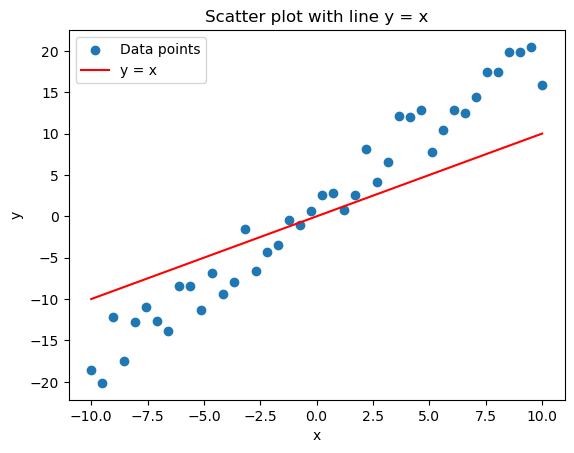

In [6]:
# Extract x and y values from the DataFrame
x_values = df['x'].values
y_values = df['y'].values

# Create a scatter plot
plt.scatter(x_values, y_values, label='Data points')

# Add a line with y-intercept of 0 and slope of 1
x_line = np.linspace(min(x_values), max(x_values), 100)
y_line = x_line  # y = 1 * x + 0
plt.plot(x_line, y_line, color='red', label='y = x')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Scatter plot with line y = x')
plt.show()

Once you have a (roughly) satisfying slope, examine a number of nearby slopes and find the "optimal" one, using the ideas (and code, if you want) from the tutorial. Please include a plot of cost vs. candidate slope that supports your answer for the optimal one.

But wait! Your jerk office-mate just screamed that they got a lower cost value than you, and therefore claims that they have a better estimate of the slope, saving the company ca$h!  

*Add a second pass to your estimate of the slope*. In other words, use the slope you just estimated as a new starting point, and have your code "zoom in" on the slopes immediately to see if you can find the spot that's the lowest of the low in the cost function.

A question to ponder: how could you terminate you search for the minimum in some justifiable way? How close is close enough? Could you use some relative improvement measure to determine how close is close enough? In other words, can you think of some reasonable way to terminate a search for a "best" parameter value?